## 감성분석

### SentiwordNet(긍정, 부정, 중립)

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np

In [2]:
# 데이터 파일 경로 설정
file_path = 'C:\\Users\\cho03\\Downloads\\세미나\\방학 세미나\\' # data가 저장된 파일 경로

In [3]:
# pickle 파일로 저장된 데이터 불러오기
import pickle
f = open(file_path + "topic_doc.pkl", "rb")
data = pickle.load(f) # 불러오기
f.close()
data

,title,doc,like,comment_cnt,comment_list,img,div,ch,ch2,title_token_list_pos,title_token_noun,doc_token_noun,doc_token_list_pos,comment_token_list_pos,comment_token_noun,doc_topic,comment_topic
0,급여노인장기요양인정신청 아들보다 딸이 부양하는 시대,저출산과 맞물려 우리가 생각해봐야 할 것이다저출산은 국가 성장의 미래 문제만으로 ...,5,<NA>,,2,0,naver,blog,"[(급여, NNG), (노인, NNP), (장기, NNP), (요양, NNP), (...","[급여, 요양, 인정, 신청, 아들, 시대]","[저출산, 저출산, 성장, 미래, 문제, 국한, 고령화사회, 시점, 세대, 생존, ...","[(저출산, NNP), (과, JC), (맞물리, VV), (어, EC), (우리,...",[],[],2,0
1,한국 2070년 노인부양 부담 세계1위,통계청 세계 한국 인구전망급속한 저출산 고령화 직격탄한국 인구 27프로 감소 3...,50,2,인구절벽인 일본보다 출생율이 낮은건 충격이에요 고령화도 예상보다 빠르고요 사회전체가...,2,0,naver,blog,"[(한국, NNP), (2070, SN), (년, NNB), (노인, NNP), (...",[부담],"[통계청, 인구, 전망, 급속, 저출산, 직격탄, 인구, 프로, 인구, 프로, 프로...","[(통계청, NNG), (세계, NNG), (한국, NNP), (인구, NNG), ...","[(인구, NNP), (절벽, NNP), (이, VCP), (ㄴ, ETM), (일본...","[인구, 절벽, 일본, 출생, 충격, 예상, 전체, 고민, 출산, 육아, 전체, 고민]",2,1
2,여성노인 부양,부양제2판 노인복지론 2002 p284부양의 양과 종류는 가족이 가진 경제적 자...,4,<NA>,,4,0,naver,blog,"[(여성, NNG), (노인, NNP), (부양, NNP)]",[여성],"[복지, 종류, 자원, 구조, 부양자, 피부, 관계, 에너지, 필요, 문제, 지의,...","[(부양, NNP), (제, XPN), (2, SN), (판, NNB), (노인, ...",[],[],1,0
3,65세 이상 노인 부양가정이라면,65세 이상 노인 부양가정이라면안녕하세요저희는 어르신들의 남은 여생을 더욱 풍요롭고...,3,1,좋은 소식 열심히 읽고 갑니다,12,1,naver,blog,"[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (부양...",[가정],"[가정, 라면, 남은, 여생, 풍요, 안락, 최선, 노력, 복지, 센터, 소식, 인...","[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (부양...","[(좋, VA), (은, ETM), (소식, NNG), (열심히, MAG), (읽,...",[소식],2,2
4,가족관계 변화와 노인 부양,가족관계 변화와 노인 부양노인 거주 형태의 변화 혼자 살거나 노부부만 사는 세대가...,2,<NA>,,1,0,naver,blog,"[(가족, NNG), (관계, NNG), (변화, NNG), (와, JC), (노인...","[관계, 변화]","[관계, 변화, 거주, 형태, 변화, 부부, 세대, 추세, 부부, 관계, 변화, 부...","[(가족, NNG), (관계, NNG), (변화, NNG), (와, JC), (노인...",[],[],1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다이런 질문부터 시작 해 보자 당...,3,4,감사합니다좋은 글 잘 읽고 갑니다목요일날을 잘 보내셨는지요 저녁시간에 컴퓨터앞에 앉...,4,0,daum,cafe,"[(노인, NNG), (은, JX), (무엇, NP), (으로, JKB), (살, ...","[감사, 마음]","[감사, 마음, 시작, 인생, 감사, 감사, 감사, 길목, 대차, 대조표, 후회, ...","[(노인, NNG), (은, JX), (무엇, NP), (으로, JKB), (살, ...","[(감사, NNG), (하, XSV), (ㅂ니다, EC), (좋, VA), (은, ...","[감사, 목요일, 저녁, 컴퓨터, 음악, 소리, 비소, 예보, 미세먼지, 코로나, ...",3,2
2163,한 장으로 보는 우리나라가 망한 이유jpg,출처대한민국 통계청인류 역사상 유래 없는 현상곧우리나라인구의40가65세이상노인으로구...,3,59,통일되서 자신들의 기득권이 없어지느니 망해버리길 바랄겁니다 그런자들 이니까인구관련 ...,2,0,daum,cafe,"[(한, MM), (장, NNG), (으로, JKB), (보, VV), (는, ET...",[이유],"[출처, 대한민국 통계청, 인류, 역사, 유래, 현상, 인구, 구성, 비가, 청년,...","[(출처, NNG), (대한민국 통계청, NNP), (인류, NNG), (역사, N...","[(통일, NNG), (되, XSV), (서, EC), (자신, NNG), (들, ...","[통일, 기득, 바랄, 인구, 관련, 대표, 넌센스, 북한, 남한, 북한, 남한, ...",1,1
2164,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄by M가이드현재...,0,0,,6,0,daum,cafe,"[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (혜택...","[혜택, 가지]","[혜택, 가지, 가이드, 규정, 연금, 요양, 혜택, 혜택, 가지, 혜택, 가지, ...","[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (혜택...",[],[],2,0
2165,청주주간보호 청주요양원 추천 kbs방영된 프로그램전문기관 재활운동 요양등급상담 99...,KBS방영된 프로그램전문기관 9988 청주노인주간보호센터입니다 33명 정원의 아늑한...,0,0,,26,2,daum,cafe,"[(청주, NNP), (주간, NNG), (보호, NNG), (청주, NNP), (...","[보호, 요양원, 방영, 프로그램, 전문, 기관, 재활, 운동, 요양, 상담, 보호...","[방영, 프로그램, 전문, 기관, 보호, 센터, 정원, 분위기, 부모, 마음, 부모...","[(KBS, SL), (방영, NNG), (되, XSV), (ㄴ, ETM), (프로...",[],[],1,0


In [4]:
# 데이터프레임에 감성분석 score 삽입
import json
from tqdm import tqdm
# 감정분석 json데이터(knu감성사전) 불러오기
with open(file_path + '\\KnuSentiLex-master\\data\\SentiWord_info.json',encoding = 'UTF-8') as json_file:
    sentiword = json.load(json_file)

s_word = []  
values = []
score = []

def average(list):  # 각 문서의 평균 감성 score 반환  # 리스트의 평균 값을 계산하는 함수
    return sum(list)/len(list)

for word in tqdm(data['doc']):
    temp_s_word=[]    # 문서에서 발견된 감성 단어 리스트 초기화
    temp_value=[]
    
# 감성사전에 있는 단어와 현재 문서의 단어 비교
    for s in sentiword:
        if s['word'] in word:
            if len(s['word']) > 1 : # 한글자 이상의 감성단어와 비교 
                temp_s_word.append(s['word'])
                temp_value.append(int(s['polarity'])) 
    s_word.append(temp_s_word) # 해당하는 감성단어 추가
    values.append(temp_value) # 해당 단어의 polarity값 추가
    try:
        score.append(average(temp_value)) # 각 문서의 평균 polarity 추가
    except ZeroDivisionError:
        score.append(int(0))

# 결과 데이터프레임에 감성분석 결과 삽입
data=data.assign(sentiword = s_word,values=values,score=score) # 결과 데이터프레임에 삽입

  0%|          | 0/2167 [00:00<?, ?it/s]100%|██████████| 2167/2167 [01:44<00:00, 20.69it/s]


In [5]:
import pickle

# 갱신된 데이터프레임 파일로 저장
f = open(file_path + "total_docs1.pkl", "wb")
pickle.dump(data, f)
f.close()

In [6]:
import pickle

# 불러오기
f = open(file_path + "total_docs1.pkl", "rb")
ff = pickle.load(f)
f.close()

In [7]:
# 데이터프레임 복원
import pandas as pd
total_docs = pd.DataFrame()
total_docs['doc'] = ff['doc']
total_docs['doc_token_noun'] = ff['doc_token_noun']
total_docs['doc_topic'] = ff['doc_topic']
total_docs['comment_topic'] = ff['comment_topic']
total_docs['sentiword'] = ff['sentiword']
total_docs['values'] = ff['values']
total_docs['score'] = ff['score']
total_docs

,doc,doc_token_noun,doc_topic,comment_topic,sentiword,values,score
0,저출산과 맞물려 우리가 생각해봐야 할 것이다저출산은 국가 성장의 미래 문제만으로 ...,"[저출산, 저출산, 성장, 미래, 문제, 국한, 고령화사회, 시점, 세대, 생존, ...",2,0,"[강하게, 개선, 그릇된, 긍정, 긍정적, 긍정적으로, 기대, 넉넉한, 대상, 못된...","[1, 2, -2, 1, 1, 2, 1, 1, 1, -2, -1, -1, 1, 1,...",-0.234043
1,통계청 세계 한국 인구전망급속한 저출산 고령화 직격탄한국 인구 27프로 감소 3...,"[통계청, 인구, 전망, 급속, 저출산, 직격탄, 인구, 프로, 인구, 프로, 프로...",2,1,"[강하게, 격한, 기대, 기대되는, 부담, 비관적, 비관적인, 성이, 스트레스, 좋...","[1, -2, 1, 2, -2, -2, -2, 0, -2, 2, 2, 2, -2]",-0.153846
2,부양제2판 노인복지론 2002 p284부양의 양과 종류는 가족이 가진 경제적 자...,"[복지, 종류, 자원, 구조, 부양자, 피부, 관계, 에너지, 필요, 문제, 지의,...",1,0,"[높은, 대가, 대상, 도움, 도움을 주는, 스트레스, 심한, 약하면, 어려움, 어...","[1, 1, 1, 1, 2, -2, -2, -1, -2, -2, -1, -1, -2...",-0.533333
3,65세 이상 노인 부양가정이라면안녕하세요저희는 어르신들의 남은 여생을 더욱 풍요롭고...,"[가정, 라면, 남은, 여생, 풍요, 안락, 최선, 노력, 복지, 센터, 소식, 인...",2,2,"[감사, 고충, 꼼꼼하게, 대가, 도움, 무료로, 병을, 분이나, 새로운, 소득, ...","[2, -2, 1, 1, 1, 1, -2, -2, 1, 1, 1, 1, 2, -2,...",0.533333
4,가족관계 변화와 노인 부양노인 거주 형태의 변화 혼자 살거나 노부부만 사는 세대가...,"[관계, 변화, 거주, 형태, 변화, 부부, 세대, 추세, 부부, 관계, 변화, 부...",1,0,"[가치, 갈등, 감사, 고통, 긍정, 긍정적, 긍정적으로, 대가, 독감, 만족, 바...","[1, -1, 2, -2, 1, 1, 2, 1, -1, 2, 2, -2, -1, -...",0.160000
...,...,...,...,...,...,...,...
2162,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다이런 질문부터 시작 해 보자 당...,"[감사, 마음, 시작, 인생, 감사, 감사, 감사, 길목, 대차, 대조표, 후회, ...",3,2,"[감동, 감사, 감사하는, 감사하다, 근심, 근심이, 긍정, 긍정적, 긍정적인, 기...","[2, 2, 2, 2, -1, -1, 1, 1, 2, 2, 1, -1, 2, 2, ...",0.966102
2163,출처대한민국 통계청인류 역사상 유래 없는 현상곧우리나라인구의40가65세이상노인으로구...,"[출처, 대한민국 통계청, 인류, 역사, 유래, 현상, 인구, 구성, 비가, 청년,...",1,1,[],[],0.000000
2164,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄by M가이드현재...,"[혜택, 가지, 가이드, 규정, 연금, 요양, 혜택, 혜택, 가지, 혜택, 가지, ...",2,0,"[걱정, 고혈압, 대상, 도움, 많다, 모르는, 무료로, 부담, 분에, 불편, 불편...","[-2, -1, 1, 1, 2, -1, 1, -2, -2, -2, -2, 2, 0,...",0.050000
2165,KBS방영된 프로그램전문기관 9988 청주노인주간보호센터입니다 33명 정원의 아늑한...,"[방영, 프로그램, 전문, 기관, 보호, 센터, 정원, 분위기, 부모, 마음, 부모...",1,0,"[감사, 강하게, 따뜻하고, 모시, 믿고, 부담, 소중한, 아늑한, 예방, 위기, ...","[2, 1, 2, -1, 1, -2, 2, 1, 1, -1, 1, 2, 2, 2, ...",1.052632


### 감성분석(토픽)

In [8]:
# 토픽별 평균 score에 따른 감성 클래스 구분
# 토픽별 평균 score 0.3 초과  -> 긍정
# 토픽별 평균 score -0.3 이상 0.3 이하  -> 중립
# 토픽별 평균 score -0.3 미만  -> 부정

senti_0 = [0,0,0,0,0,0]
senti_1 = [0,0,0,0,0,0]
senti_2 = [0,0,0,0,0,0]
senti_3 = [0,0,0,0,0,0]

for i in range(len(total_docs)):
    if total_docs['doc_topic'].iloc[i] == 0:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_0[0] = senti_0[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_0[2] = senti_0[2] + 1
        else:
            senti_0[4] = senti_0[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 1:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_1[0] = senti_1[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_1[2] = senti_1[2] + 1
        else:
            senti_1[4] = senti_1[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 2:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_2[0] = senti_2[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_2[2] = senti_2[2] + 1
        else:
            senti_2[4] = senti_2[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 3:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_3[0] = senti_3[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_3[2] = senti_3[2] + 1
        else:
            senti_3[4] = senti_3[4] + 1

In [9]:
# 감성 클래스별 비율 계산
for i in range(1,7,2):
    senti_0[i] = senti_0[i-1] / (senti_0[0]+senti_0[2]+senti_0[4])
for i in range(1,7,2):
    senti_1[i] = senti_1[i-1] / (senti_1[0]+senti_1[2]+senti_3[4])
for i in range(1,7,2):
    senti_2[i] = senti_2[i-1] / (senti_2[0]+senti_2[2]+senti_3[4])
for i in range(1,7,2):
    senti_3[i] = senti_3[i-1] / (senti_3[0]+senti_3[2]+senti_3[4])

In [10]:
# 토픽별 감성 비율 데이터프레임 생성
graph = pd.DataFrame([senti_0,senti_1,senti_2,senti_3],
                  index=['topic1','topic2','topic3','topic4'],
                  columns=[['긍정','긍정','중립','중립','부정','부정'],['빈도','비율','빈도','비율','빈도','비율']])

In [11]:
graph

긍정             중립             부정          
         빈도        비율   빈도        비율   빈도        비율
topic1   94  0.271676  145  0.419075  107  0.309249
topic2  127  0.306763  277  0.669082  291  0.702899
topic3  309  0.419837  417  0.566576  313  0.425272
topic4   67  0.770115   10  0.114943   10  0.114943

In [12]:
# 토픽별 감성 빈도수 막대 그래프
senti_bar = pd.DataFrame([[senti_0[0],senti_0[2],senti_0[4]],[senti_1[0],senti_1[2],senti_1[4]],[senti_2[0],senti_2[2],senti_2[4]],[senti_3[0],senti_3[2],senti_3[4]]],
                  index=['topic1','topic2','topic3','topic4'],
                  columns=['긍정','중립','부정'])

In [13]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family = 'Malgun Gothic')

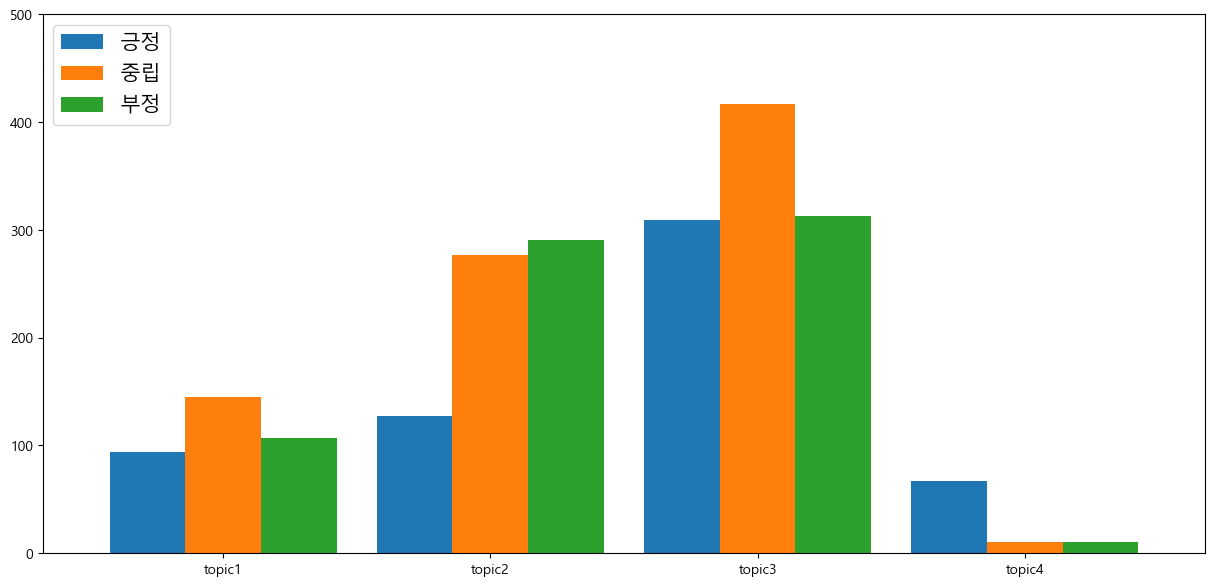

In [14]:
# 토픽별 감성 빈도수 막대 그래프 그리기
senti_plot = senti_bar.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85, ylim=[0,500])  

senti_plot.legend(fontsize=15,loc=2) # label 글자 크기, 위치 조정

### 감성분석(전체)

In [15]:
# 전체 평균 score에 따른 감성 클래스 구분
# 전체 평균 score 0.3 초과  -> 긍정
# 전체 평균 score -0.3 이상 0.3 이하  -> 중립
# 전체 평균 score -0.3 미만  -> 부정

senti_total = [0,0,0,0,0,0]

for i in range(len(total_docs)):
    if total_docs['score'].iloc[i] > 0.3:  
        senti_total[0] = senti_total[0] + 1
    elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
        senti_total[2] = senti_total[2] + 1
    else:
        senti_total[4] = senti_total[4] + 1

In [16]:
# 전체 감성 클래스별 비율 계산
for i in range(1,7,2):
    senti_total[i] = senti_total[i-1] / (senti_total[0] + senti_total[2] +senti_total[4])

In [17]:
# 전체 감성 비율 데이터프레임 생성
graph = pd.DataFrame([senti_total], index=['전체'],
                  columns=[['긍정','긍정','중립','중립','부정','부정'],['빈도','비율','빈도','비율','빈도','비율']])

In [18]:
graph

긍정             중립             부정          
     빈도        비율   빈도        비율   빈도        비율
전체  597  0.275496  849  0.391786  721  0.332718

In [19]:
# 전체 감성 빈도수 막대 그래프
senti_bar = pd.DataFrame([[senti_total[0],senti_total[2],senti_total[4]],],
                        index = ['전체'], columns = ['긍정','중립','부정'])

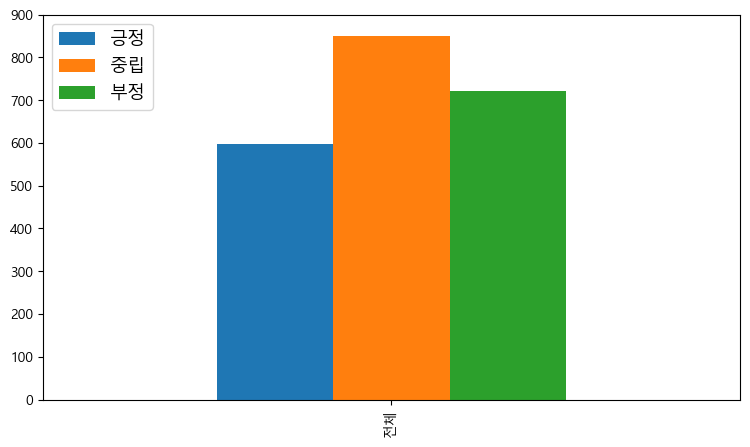

In [20]:
# 전체 감성 빈도수 막대 그래프 그리기
senti_plot = senti_bar.plot.bar(figsize=(9,5),  ylim=[0,900]); 
senti_plot.legend(fontsize=13,loc=2)

### Emolex

In [21]:
# pickle 파일에서 데이터 불러오기
import pickle
f = open(file_path + "topic_doc.pkl", "rb")
data = pickle.load(f) # 불러오기
f.close()
data

,title,doc,like,comment_cnt,comment_list,img,div,ch,ch2,title_token_list_pos,title_token_noun,doc_token_noun,doc_token_list_pos,comment_token_list_pos,comment_token_noun,doc_topic,comment_topic
0,급여노인장기요양인정신청 아들보다 딸이 부양하는 시대,저출산과 맞물려 우리가 생각해봐야 할 것이다저출산은 국가 성장의 미래 문제만으로 ...,5,<NA>,,2,0,naver,blog,"[(급여, NNG), (노인, NNP), (장기, NNP), (요양, NNP), (...","[급여, 요양, 인정, 신청, 아들, 시대]","[저출산, 저출산, 성장, 미래, 문제, 국한, 고령화사회, 시점, 세대, 생존, ...","[(저출산, NNP), (과, JC), (맞물리, VV), (어, EC), (우리,...",[],[],2,0
1,한국 2070년 노인부양 부담 세계1위,통계청 세계 한국 인구전망급속한 저출산 고령화 직격탄한국 인구 27프로 감소 3...,50,2,인구절벽인 일본보다 출생율이 낮은건 충격이에요 고령화도 예상보다 빠르고요 사회전체가...,2,0,naver,blog,"[(한국, NNP), (2070, SN), (년, NNB), (노인, NNP), (...",[부담],"[통계청, 인구, 전망, 급속, 저출산, 직격탄, 인구, 프로, 인구, 프로, 프로...","[(통계청, NNG), (세계, NNG), (한국, NNP), (인구, NNG), ...","[(인구, NNP), (절벽, NNP), (이, VCP), (ㄴ, ETM), (일본...","[인구, 절벽, 일본, 출생, 충격, 예상, 전체, 고민, 출산, 육아, 전체, 고민]",2,1
2,여성노인 부양,부양제2판 노인복지론 2002 p284부양의 양과 종류는 가족이 가진 경제적 자...,4,<NA>,,4,0,naver,blog,"[(여성, NNG), (노인, NNP), (부양, NNP)]",[여성],"[복지, 종류, 자원, 구조, 부양자, 피부, 관계, 에너지, 필요, 문제, 지의,...","[(부양, NNP), (제, XPN), (2, SN), (판, NNB), (노인, ...",[],[],1,0
3,65세 이상 노인 부양가정이라면,65세 이상 노인 부양가정이라면안녕하세요저희는 어르신들의 남은 여생을 더욱 풍요롭고...,3,1,좋은 소식 열심히 읽고 갑니다,12,1,naver,blog,"[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (부양...",[가정],"[가정, 라면, 남은, 여생, 풍요, 안락, 최선, 노력, 복지, 센터, 소식, 인...","[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (부양...","[(좋, VA), (은, ETM), (소식, NNG), (열심히, MAG), (읽,...",[소식],2,2
4,가족관계 변화와 노인 부양,가족관계 변화와 노인 부양노인 거주 형태의 변화 혼자 살거나 노부부만 사는 세대가...,2,<NA>,,1,0,naver,blog,"[(가족, NNG), (관계, NNG), (변화, NNG), (와, JC), (노인...","[관계, 변화]","[관계, 변화, 거주, 형태, 변화, 부부, 세대, 추세, 부부, 관계, 변화, 부...","[(가족, NNG), (관계, NNG), (변화, NNG), (와, JC), (노인...",[],[],1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다이런 질문부터 시작 해 보자 당...,3,4,감사합니다좋은 글 잘 읽고 갑니다목요일날을 잘 보내셨는지요 저녁시간에 컴퓨터앞에 앉...,4,0,daum,cafe,"[(노인, NNG), (은, JX), (무엇, NP), (으로, JKB), (살, ...","[감사, 마음]","[감사, 마음, 시작, 인생, 감사, 감사, 감사, 길목, 대차, 대조표, 후회, ...","[(노인, NNG), (은, JX), (무엇, NP), (으로, JKB), (살, ...","[(감사, NNG), (하, XSV), (ㅂ니다, EC), (좋, VA), (은, ...","[감사, 목요일, 저녁, 컴퓨터, 음악, 소리, 비소, 예보, 미세먼지, 코로나, ...",3,2
2163,한 장으로 보는 우리나라가 망한 이유jpg,출처대한민국 통계청인류 역사상 유래 없는 현상곧우리나라인구의40가65세이상노인으로구...,3,59,통일되서 자신들의 기득권이 없어지느니 망해버리길 바랄겁니다 그런자들 이니까인구관련 ...,2,0,daum,cafe,"[(한, MM), (장, NNG), (으로, JKB), (보, VV), (는, ET...",[이유],"[출처, 대한민국 통계청, 인류, 역사, 유래, 현상, 인구, 구성, 비가, 청년,...","[(출처, NNG), (대한민국 통계청, NNP), (인류, NNG), (역사, N...","[(통일, NNG), (되, XSV), (서, EC), (자신, NNG), (들, ...","[통일, 기득, 바랄, 인구, 관련, 대표, 넌센스, 북한, 남한, 북한, 남한, ...",1,1
2164,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄by M가이드현재...,0,0,,6,0,daum,cafe,"[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (혜택...","[혜택, 가지]","[혜택, 가지, 가이드, 규정, 연금, 요양, 혜택, 혜택, 가지, 혜택, 가지, ...","[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (혜택...",[],[],2,0
2165,청주주간보호 청주요양원 추천 kbs방영된 프로그램전문기관 재활운동 요양등급상담 99...,KBS방영된 프로그램전문기관 9988 청주노인주간보호센터입니다 33명 정원의 아늑한...,0,0,,26,2,daum,cafe,"[(청주, NNP), (주간, NNG), (보호, NNG), (청주, NNP), (...","[보호, 요양원, 방영, 프로그램, 전문, 기관, 재활, 운동, 요양, 상담, 보호...","[방영, 프로그램, 전문, 기관, 보호, 센터, 정원, 분위기, 부모, 마음, 부모...","[(KBS, SL), (방영, NNG), (되, XSV), (ㄴ, ETM), (프로...",[],[],1,0


In [22]:
# 한국어 감성사전 파일 불러오기
nrc = pd.read_table(file_path + "Korean-NRC-EmoLex.txt", engine = "python", header = None, sep = "\t")

In [23]:
# 감성사전 열 이름 지정 및 불필요한 행 제거
nrc.columns = nrc.iloc[0]
nrc = nrc[1:]
nrc.reset_index(drop=True, inplace=True)
nrc

,English Word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,Korean Word
0,aback,0,0,0,0,0,0,0,0,0,0,당황
1,abacus,0,0,0,0,0,0,0,0,0,1,주판
2,abandon,0,0,0,1,0,1,0,1,0,0,버리다
3,abandoned,1,0,0,1,0,1,0,1,0,0,버려진
4,abandonment,1,0,0,1,0,1,0,1,1,0,포기
...,...,...,...,...,...,...,...,...,...,...,...,...
14149,zone,0,0,0,0,0,0,0,0,0,0,존
14150,zoo,0,0,0,0,0,0,0,0,0,0,동물원
14151,zoological,0,0,0,0,0,0,0,0,0,0,동물학
14152,zoology,0,0,0,0,0,0,0,0,0,0,동물학


In [24]:
# 데이터프레임에 감성사전의 감성값 삽입
s_word = []
values = []

for word in tqdm(data['doc']):
    temp_s_word=[]   # 문서에서 발견된 감성사전의 단어 리스트 초기화
    temp_value = [0,0,0,0,0,0,0,0,0,0]   # 초기 감성값 리스트 초기화
    
# 감성사전의 단어와 현재 문서의 단어를 비교
    for i in range(1, len(data)):
        if nrc['Korean Word'][i] in word:
            if len(nrc['Korean Word'][i]) > 1:
                temp_s_word.append(nrc['Korean Word'][i])
                b = list(map(int, nrc.iloc[i,1:11].tolist()))
                temp_value = [x + y for x, y in zip(temp_value,b)]
    s_word.append(temp_s_word) # 현재 문서에서 발견된 감성사전의 단어 리스트를 전체 리스트에 추가
    values.append(temp_value)  # 현재 문서에서 발견된 감성사전의 감성값 리스트를 전체 리스트에 추가

# 결과 데이터프레임에 감성사전 결과 삽입
data=data.assign(sentiword = s_word,values=values) # 결과 데이터프레임에 삽입

100%|██████████| 2167/2167 [01:11<00:00, 30.45it/s]


In [25]:
import pickle

# 갱신된 데이터프레임 파일로 저장
f = open(file_path + "total_docs2.pkl", "wb")
pickle.dump(data, f)
f.close()

In [26]:
import pickle

# 불러오기
f = open(file_path + "total_docs2.pkl", "rb")
ff = pickle.load(f)
f.close()
ff

,title,doc,like,comment_cnt,comment_list,img,div,ch,ch2,title_token_list_pos,title_token_noun,doc_token_noun,doc_token_list_pos,comment_token_list_pos,comment_token_noun,doc_topic,comment_topic,sentiword,values
0,급여노인장기요양인정신청 아들보다 딸이 부양하는 시대,저출산과 맞물려 우리가 생각해봐야 할 것이다저출산은 국가 성장의 미래 문제만으로 ...,5,<NA>,,2,0,naver,blog,"[(급여, NNG), (노인, NNP), (장기, NNP), (요양, NNP), (...","[급여, 요양, 인정, 신청, 아들, 시대]","[저출산, 저출산, 성장, 미래, 문제, 국한, 고령화사회, 시점, 세대, 생존, ...","[(저출산, NNP), (과, JC), (맞물리, VV), (어, EC), (우리,...",[],[],2,0,"[이상, 학원, 정확한, 인정, 행동, 배우, 실제, 현실, 적절, 인정, 인정, ...","[1, 4, 1, 7, 1, 6, 13, 2, 1, 6]"
1,한국 2070년 노인부양 부담 세계1위,통계청 세계 한국 인구전망급속한 저출산 고령화 직격탄한국 인구 27프로 감소 3...,50,2,인구절벽인 일본보다 출생율이 낮은건 충격이에요 고령화도 예상보다 빠르고요 사회전체가...,2,0,naver,blog,"[(한국, NNP), (2070, SN), (년, NNB), (노인, NNP), (...",[부담],"[통계청, 인구, 전망, 급속, 저출산, 직격탄, 인구, 프로, 인구, 프로, 프로...","[(통계청, NNG), (세계, NNG), (한국, NNP), (인구, NNG), ...","[(인구, NNP), (절벽, NNP), (이, VCP), (ㄴ, ETM), (일본...","[인구, 절벽, 일본, 출생, 충격, 예상, 전체, 고민, 출산, 육아, 전체, 고민]",2,1,"[감소, 감소, 이상, 갑자기, 증가, 안녕, 관리, 나이, 아이, 위에, 연금, ...","[0, 2, 1, 2, 1, 2, 1, 0, 1, 1]"
2,여성노인 부양,부양제2판 노인복지론 2002 p284부양의 양과 종류는 가족이 가진 경제적 자...,4,<NA>,,4,0,naver,blog,"[(여성, NNG), (노인, NNP), (부양, NNP)]",[여성],"[복지, 종류, 자원, 구조, 부양자, 피부, 관계, 에너지, 필요, 문제, 지의,...","[(부양, NNP), (제, XPN), (2, SN), (판, NNB), (노인, ...",[],[],1,0,"[이상, 요약, 책임, 배우, 양자, 역경, 분석, 생기, 인가, 측면, 보다, 신...","[1, 1, 1, 3, 1, 5, 3, 1, 1, 2]"
3,65세 이상 노인 부양가정이라면,65세 이상 노인 부양가정이라면안녕하세요저희는 어르신들의 남은 여생을 더욱 풍요롭고...,3,1,좋은 소식 열심히 읽고 갑니다,12,1,naver,blog,"[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (부양...",[가정],"[가정, 라면, 남은, 여생, 풍요, 안락, 최선, 노력, 복지, 센터, 소식, 인...","[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (부양...","[(좋, VA), (은, ETM), (소식, NNG), (열심히, MAG), (읽,...",[소식],2,2,"[이상, 책임, 활동, 안녕, 광고, 비행기, 지원, 비행기, 대주, 변경, 확대,...","[1, 3, 2, 3, 1, 7, 7, 2, 1, 5]"
4,가족관계 변화와 노인 부양,가족관계 변화와 노인 부양노인 거주 형태의 변화 혼자 살거나 노부부만 사는 세대가...,2,<NA>,,1,0,naver,blog,"[(가족, NNG), (관계, NNG), (변화, NNG), (와, JC), (노인...","[관계, 변화]","[관계, 변화, 거주, 형태, 변화, 부부, 세대, 추세, 부부, 관계, 변화, 부...","[(가족, NNG), (관계, NNG), (변화, NNG), (와, JC), (노인...",[],[],1,0,"[책임, 증가, 인정, 배우, 인정, 인정, 애정, 애정, 긍정적, 긍정적으로, 고...","[3, 2, 2, 6, 3, 8, 9, 3, 1, 7]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다이런 질문부터 시작 해 보자 당...,3,4,감사합니다좋은 글 잘 읽고 갑니다목요일날을 잘 보내셨는지요 저녁시간에 컴퓨터앞에 앉...,4,0,daum,cafe,"[(노인, NNG), (은, JX), (무엇, NP), (으로, JKB), (살, ...","[감사, 마음]","[감사, 마음, 시작, 인생, 감사, 감사, 감사, 길목, 대차, 대조표, 후회, ...","[(노인, NNG), (은, JX), (무엇, NP), (으로, JKB), (살, ...","[(감사, NNG), (하, XSV), (ㅂ니다, EC), (좋, VA), (은, ...","[감사, 목요일, 저녁, 컴퓨터, 음악, 소리, 비소, 예보, 미세먼지, 코로나, ...",3,2,"[이상, 증가, 성취, 배우, 영향을 미치는, 긍정적, 아가, 전부, 충분히, 즐거...","[0, 3, 1, 3, 8, 3, 17, 0, 0, 7]"
2163,한 장으로 보는 우리나라가 망한 이유jpg,출처대한민국 통계청인류 역사상 유래 없는 현상곧우리나라인구의40가65세이상노인으로구...,3,59,통일되서 자신들의 기득권이 없어지느니 망해버리길 바랄겁니다 그런자들 이니까인구관련 ...,2,0,daum,cafe,"[(한, MM), (장, NNG), (으로, JKB), (보, VV), (는, ET...",[이유],"[출처, 대한민국 통계청, 인류, 역사, 유래, 현상, 인구, 구성, 비가, 청년,...","[(출처, NNG), (대한민국 통계청, NNP), (인류, NNG), (역사, N...","[(통일, NNG), (되, XSV), (서, EC), (자신, NNG), (들, ...","[통일, 기득, 바랄, 인구, 관련, 대표, 넌센스, 북한, 남한, 북한, 남한, ...",1,1,[이상],"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]"
2164,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄by M가이드현재...,0,0,,6,0,daum,cafe,"[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (혜택...","[혜택, 가지]","[혜택, 가지, 가이드, 규정, 연금, 요양, 혜택, 혜택, 가지, 혜택, 가지, ...","[(65, SN), (세, NNB), (이상, NNG), (노인, NNG), (혜택...",[],[],2,0,"[이상, 해외에서, 입장, 가입, 인정, 활동, 현실, 추가, 조정, 관리, 가입,...","[1, 2, 3, 2, 0, 8, 7, 2, 2, 6]"
2165,청주주간보호 청주요양원 추천 kbs방영된 프로그램전문기관 재활운동 요양등급상담 99...,KBS방영된 프로그램전문기관 9988 청주노인주간보호센터입니다 33명 정원의 아늑한...,0,0,,26,2,daum,cafe,"[(청주, NNP), (주간, NNG), (보호, NNG), (청주, NNP), (...","[보호, 요양원, 방영, 프로그램, 전문, 기관, 재활, 운동, 요양, 상담, 보호...","[방영, 프로그램, 전문, 기관, 보호, 센터, 정원, 분위기, 부모, 마음, 부모...","[(KBS, SL), (방영, NNG), (되, XSV), (ㄴ, ETM), (프로...",[],[],1,0,"[계정, 계정, 주소, 관리, 보호, 지원, 간식, 신청, 약속, 감사, 지역, 확...","[0, 1, 0,

In [27]:
# 데이터프레임 복원
import pandas as pd
total_docs = pd.DataFrame()
total_docs['doc'] = ff['doc']
total_docs['doc_token_noun'] = ff['doc_token_noun']
total_docs['doc_topic'] = ff['doc_topic']
total_docs['comment_topic'] = ff['comment_topic']
total_docs['sentiword'] = ff['sentiword']
total_docs['values'] = ff['values']
total_docs

,doc,doc_token_noun,doc_topic,comment_topic,sentiword,values
0,저출산과 맞물려 우리가 생각해봐야 할 것이다저출산은 국가 성장의 미래 문제만으로 ...,"[저출산, 저출산, 성장, 미래, 문제, 국한, 고령화사회, 시점, 세대, 생존, ...",2,0,"[이상, 학원, 정확한, 인정, 행동, 배우, 실제, 현실, 적절, 인정, 인정, ...","[1, 4, 1, 7, 1, 6, 13, 2, 1, 6]"
1,통계청 세계 한국 인구전망급속한 저출산 고령화 직격탄한국 인구 27프로 감소 3...,"[통계청, 인구, 전망, 급속, 저출산, 직격탄, 인구, 프로, 인구, 프로, 프로...",2,1,"[감소, 감소, 이상, 갑자기, 증가, 안녕, 관리, 나이, 아이, 위에, 연금, ...","[0, 2, 1, 2, 1, 2, 1, 0, 1, 1]"
2,부양제2판 노인복지론 2002 p284부양의 양과 종류는 가족이 가진 경제적 자...,"[복지, 종류, 자원, 구조, 부양자, 피부, 관계, 에너지, 필요, 문제, 지의,...",1,0,"[이상, 요약, 책임, 배우, 양자, 역경, 분석, 생기, 인가, 측면, 보다, 신...","[1, 1, 1, 3, 1, 5, 3, 1, 1, 2]"
3,65세 이상 노인 부양가정이라면안녕하세요저희는 어르신들의 남은 여생을 더욱 풍요롭고...,"[가정, 라면, 남은, 여생, 풍요, 안락, 최선, 노력, 복지, 센터, 소식, 인...",2,2,"[이상, 책임, 활동, 안녕, 광고, 비행기, 지원, 비행기, 대주, 변경, 확대,...","[1, 3, 2, 3, 1, 7, 7, 2, 1, 5]"
4,가족관계 변화와 노인 부양노인 거주 형태의 변화 혼자 살거나 노부부만 사는 세대가...,"[관계, 변화, 거주, 형태, 변화, 부부, 세대, 추세, 부부, 관계, 변화, 부...",1,0,"[책임, 증가, 인정, 배우, 인정, 인정, 애정, 애정, 긍정적, 긍정적으로, 고...","[3, 2, 2, 6, 3, 8, 9, 3, 1, 7]"
...,...,...,...,...,...,...
2162,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다이런 질문부터 시작 해 보자 당...,"[감사, 마음, 시작, 인생, 감사, 감사, 감사, 길목, 대차, 대조표, 후회, ...",3,2,"[이상, 증가, 성취, 배우, 영향을 미치는, 긍정적, 아가, 전부, 충분히, 즐거...","[0, 3, 1, 3, 8, 3, 17, 0, 0, 7]"
2163,출처대한민국 통계청인류 역사상 유래 없는 현상곧우리나라인구의40가65세이상노인으로구...,"[출처, 대한민국 통계청, 인류, 역사, 유래, 현상, 인구, 구성, 비가, 청년,...",1,1,[이상],"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]"
2164,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄by M가이드현재...,"[혜택, 가지, 가이드, 규정, 연금, 요양, 혜택, 혜택, 가지, 혜택, 가지, ...",2,0,"[이상, 해외에서, 입장, 가입, 인정, 활동, 현실, 추가, 조정, 관리, 가입,...","[1, 2, 3, 2, 0, 8, 7, 2, 2, 6]"
2165,KBS방영된 프로그램전문기관 9988 청주노인주간보호센터입니다 33명 정원의 아늑한...,"[방영, 프로그램, 전문, 기관, 보호, 센터, 정원, 분위기, 부모, 마음, 부모...",1,0,"[계정, 계정, 주소, 관리, 보호, 지원, 간식, 신청, 약속, 감사, 지역, 확...","[0, 1, 0, 1, 1, 1, 4, 0, 0, 6]"


In [28]:
# 토픽별 감성값 누적
senti_0 = [0,0,0,0,0,0,0,0,0,0]
senti_1 = [0,0,0,0,0,0,0,0,0,0]
senti_2 = [0,0,0,0,0,0,0,0,0,0]
senti_3 = [0,0,0,0,0,0,0,0,0,0]

for i in range(len(total_docs)):
    if total_docs['doc_topic'].iloc[i] == 0:
        senti_0 = [x + y for x, y in zip(senti_0,total_docs.iloc[i,5])]
            
    elif total_docs['doc_topic'].iloc[i] == 1:
        senti_1 = [x + y for x, y in zip(senti_1,total_docs.iloc[i,5])]

            
    elif total_docs['doc_topic'].iloc[i] == 2:
        senti_2 = [x + y for x, y in zip(senti_2,total_docs.iloc[i,5])]

            
    elif total_docs['doc_topic'].iloc[i] == 3:
        senti_3 = [x + y for x, y in zip(senti_3,total_docs.iloc[i,5])]

In [30]:
# 토픽별 감성값 데이터프레임 생성
graph = pd.DataFrame([senti_0,senti_1,senti_2,senti_3],
                  index=['topic1','topic2','topic3','topic4'],
                  columns=['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust'])

In [31]:
graph

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
topic1,363,551,338,701,270,1607,2358,324,274,1031
topic2,949,1122,674,2039,674,2859,4321,884,890,1926
topic3,1073,1317,985,1914,758,3395,5002,881,691,2520
topic4,132,216,111,242,383,337,997,26,59,436


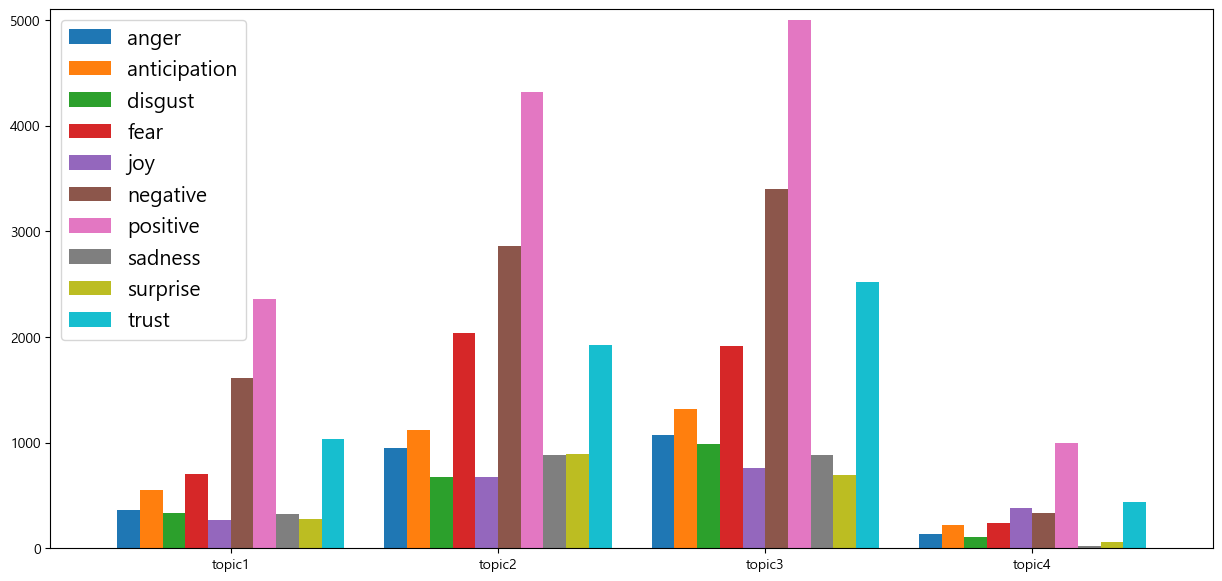

In [32]:
# 토픽별 감성값 막대 그래프
senti_plot = graph.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85, ylim=[0,5100])  


senti_plot.legend(fontsize=15,loc=2) # label 글자 크기, 위치 조정

In [33]:
# 전체 감성값 누적
senti_total = [0,0,0,0,0,0,0,0,0,0]

for i in range(len(total_docs)):
    senti_total = [x + y for x, y in zip(senti_total,total_docs.iloc[i,5])]

In [34]:
# 전체 감성값 데이터프레임 생성
graph = pd.DataFrame([senti_total],
                  index=['total'],
                  columns=['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust'])

In [35]:
graph

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
total,2517,3206,2108,4896,2085,8198,12678,2115,1914,5913


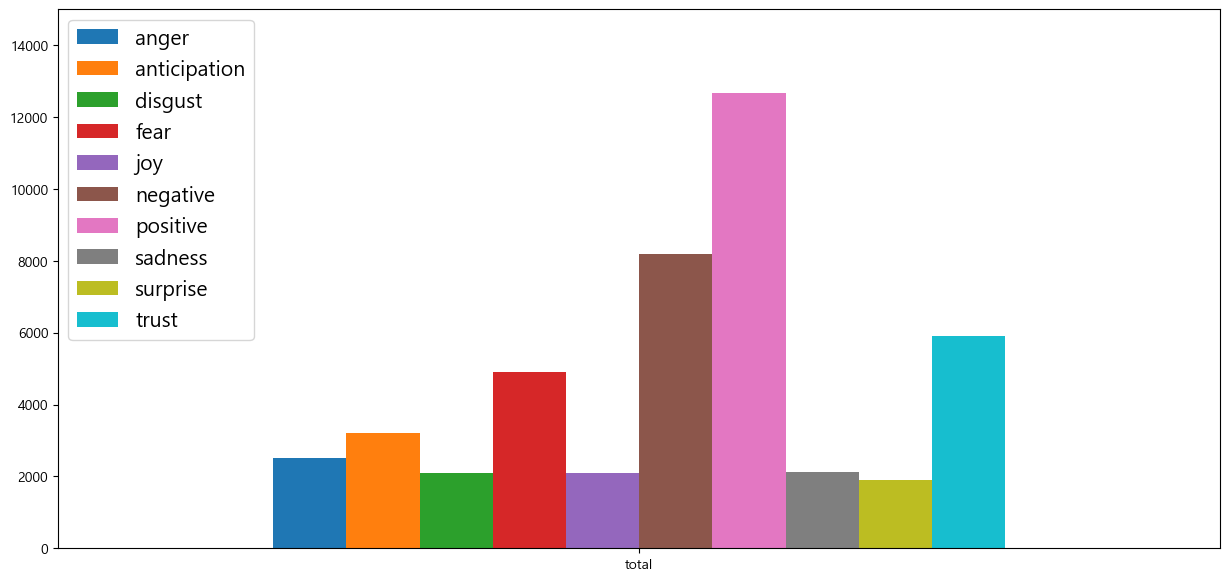

In [36]:
# 전체 감성값 막대 그래프
senti_plot = graph.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85, ylim=[0,15000])  


senti_plot.legend(fontsize=15,loc=2) # label 글자 크기, 위치 조정